### Connect Drive

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Unzip Dataset

In [8]:
!unzip gdrive/MyDnrive/UTKFace.zip

Archive:  gdrive/MyDrive/UTKFace.zip
replace __MACOSX/._UTKFace? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Import Modules

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

### Load Dataset and Create Dataframe

In [44]:
images = []
ages = []
genders = []
races = []

for filename in os.listdir('./UTKFace/'):
    image = os.path.join('./UTKFace/', filename)
    line = filename.split('_')
    age = int(line[0])
    gender = int(line[1])
    try:
      race = int(line[2])
    except:
      race = 5
    races.append(race)
    images.append(image) 
    ages.append(age)
    genders.append(gender)

In [45]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['gender'], df['race'], df['age'] = images, ages, genders, races
df.head(20)

,image,age,gender,race
0,./UTKFace/25_1_4_20161220222242243.jpg.chip.jpg,25,1,4
1,./UTKFace/24_0_1_20170117130104056.jpg.chip.jpg,24,0,1
2,./UTKFace/47_1_0_20170104184702870.jpg.chip.jpg,47,1,0
3,./UTKFace/70_1_0_20170110123134893.jpg.chip.jpg,70,1,0
4,./UTKFace/73_0_0_20170120230235659.jpg.chip.jpg,73,0,0
5,./UTKFace/46_0_0_20170104184807318.jpg.chip.jpg,46,0,0
6,./UTKFace/27_0_2_20170116184846062.jpg.chip.jpg,27,0,2
7,./UTKFace/36_0_1_20170112213546077.jpg.chip.jpg,36,0,1
8,./UTKFace/1_0_0_20170110213202543.jpg.chip.jpg,1,0,0
9,./UTKFace/26_1_3_20170119192405417.jpg.chip.jpg,26,1,3


In [7]:
df.loc[df["race"] == 0, "race"] = "White"
df.loc[df["race"] == 1, "race"] = "Black"
df.loc[df["race"] == 2, "race"] = "Asian"
df.loc[df["race"] == 3, "race"] = "Asian"
df.loc[df["race"] == 4, "race"] = "Other"
df.loc[df["race"] == 5, "race"] = "Other"

In [46]:
df_X = df['image']
df_y = df[['age', 'gender']]

In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}
race_dict = {0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Others"}

### Plot Data

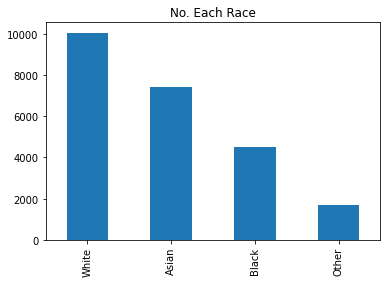

In [8]:
df['race'].value_counts().plot(kind='bar', title = "No. Each Race")

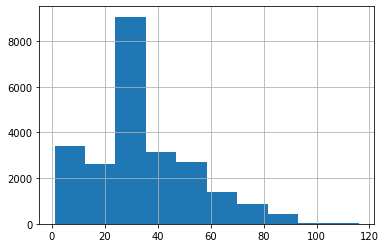

In [9]:
df['age'].hist()

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

### Image transformation

In [48]:
from PIL import Image

def transform_images(images_input):
    images = []
    for image in images_input:
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        images.append(img)
      
    images = np.array(images)
    images = images.reshape(len(images), 128, 128, 1)
    return images

In [49]:
X_train = transform_images(X_train)
X_train = X_train/255.0
X_test = transform_images(X_test)
X_test = X_test/255.0

print(X_train.shape, X_test.shape)

/usr/local/lib/python3.8/dist-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(18966, 128, 128, 1) (4742, 128, 128, 1)


In [51]:
y_gender = np.array(y_train['gender'])
y_age = np.array(y_train['age'])

y_gender_test = np.array(y_test['gender'])
y_age_test = np.array(y_test['age'])

### Model Format

In [52]:
inputs = Input(((128, 128, 1)))
convolution_1 = Conv2D(64, kernel_size=(3, 3), activation='relu') (inputs)
maxpooling_1 = MaxPooling2D(pool_size=(2, 2)) (convolution_1)
convolution_2 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxpooling_1)
maxpooling_2 = MaxPooling2D(pool_size=(2, 2)) (convolution_2)
convolution_3 = Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)) (maxpooling_2)
maxpooling_3 = MaxPooling2D(pool_size=(2, 2)) (convolution_3)

flatten = Flatten() (maxpooling_3)

dense_layer_1 = Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)) (flatten)
dense_layer_2 = Dense(256, activation='relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)) (flatten)

dropout_layer_1 = Dropout(0.3) (dense_layer_1)
dropout_layer_2 = Dropout(0.3) (dense_layer_2)

output_layer_1 = Dense(1, activation='sigmoid', name='gender') (dropout_layer_1)
output_layer_2 = Dense(1, activation='relu', name='ages') (dropout_layer_2)

model = Model(inputs=[inputs], outputs=[output_layer_1, output_layer_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

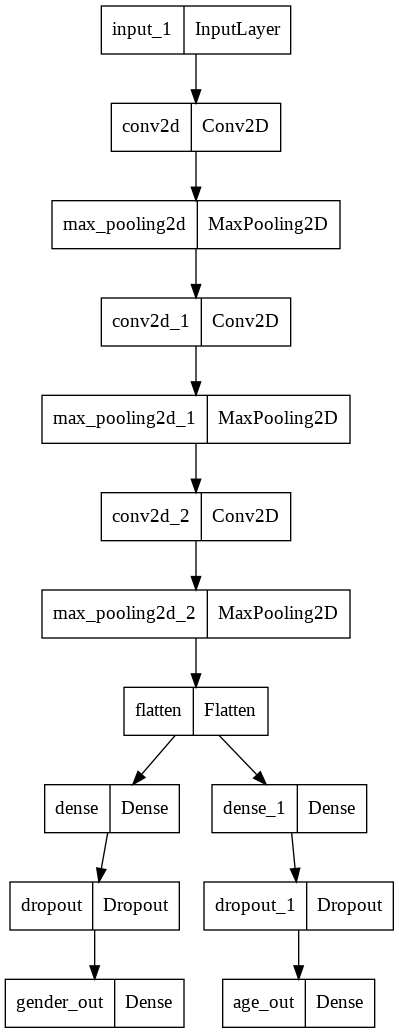

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model)

### Train Model

In [ ]:
history = model.fit(x=X_train, y=[y_gender, y_age], batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
122/475 [======>.......................] - ETA: 17:10 - loss: 20.9494 - gender_out_loss: 0.7342 - age_out_loss: 18.1315 - gender_out_accuracy: 0.5499 - age_out_accuracy: 0.0451

### Assess Accuracy

In [ ]:
ages = []
genders = []
for i in range(X_test.shape[0]):
  pred = model.predict(X_test[i].reshape(1,128,128,1))
  pred_gender = round(pred[0][0][0])
  pred_age = round(pred[1][0][0])
  if pred_age == y_age_test[i]:
    ages.append(True)
  if pred_gender == y_gender_test[i]:
    genders.append(True)

In [ ]:
sum(np.array(genders))/X_test.shape[0]

In [ ]:
sum(np.array(ages))/X_test.shape[0]

### Plot Loss and Accuracy

In [ ]:
# plot results for gender
acc = history.history['gender_accuracy']
val_acc = history.history['val_gender_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_loss']
val_loss = history.history['val_gender_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Gender Loss Graph')
plt.legend()
plt.show()

In [ ]:
# plot results for age
loss = history.history['ages_loss']
val_loss = history.history['val_ages_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r'           
         , label='Validation Loss')
plt.title('Age Loss Graph')
plt.legend()
plt.show()
